## Data Generation
「sin + 線形項 + ガウスノイズ」の関数からデータ点をランダムに生成

In [1]:
import numpy as np
from scripts.data_generator import DataGenerator
np.random.seed(0)

generator = DataGenerator(function = lambda x : np.sin(np.pi * x)/(np.pi * x) + 0.1 * x + 0.05 * np.random.normal(loc=0., scale=1.))
data = generator(50, low=-3, high=3)
xs, ys = data

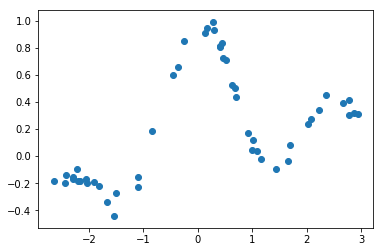

In [2]:
%matplotlib inline
from scripts.visualizers import plot_regression
plot_regression(xs, ys)

## Model fitting
多項式を基底関数として学習する。

In [3]:
from models.modules.basis_functions import Polynomial

basis_functions = [Polynomial(dim=i) for i in range(20)]

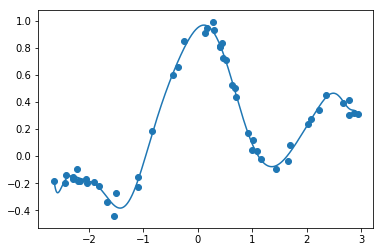

In [4]:
from models.linear_regressor import LinearRegressor


model = LinearRegressor(basis_functions=basis_functions)
model.fit(xs, ys)
plot_regression(xs, ys, classifier=model)

## Gauss Kernel
ガウスカーネルモデル。  
L1 と L2 の正則化の違いをみる。

100%|██████████| 1000/1000 [00:00<00:00, 57863.64it/s]


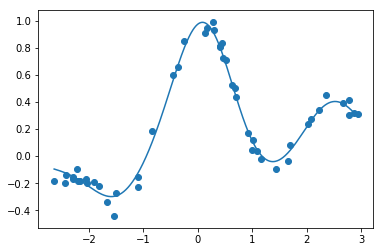

In [5]:
from models.gauss_kernel_regressor import GaussKernelRegressor


model_l1 = GaussKernelRegressor(width=0.5, l1_regularization=0.1)
model_l1.fit(xs, ys)
plot_regression(xs, ys, classifier=model_l1)

100%|██████████| 1000/1000 [00:00<00:00, 50804.95it/s]


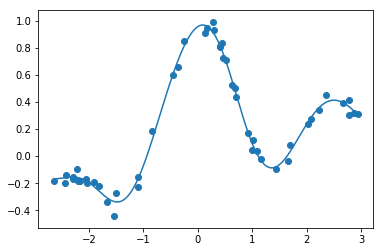

In [6]:
model_l2 = GaussKernelRegressor(width=0.5, l2_regularization=0.1)
model_l2.fit(xs, ys)
plot_regression(xs, ys, classifier=model_l2)

0に近いパラメータの数を L1 と L2 のモデルで比べると L1 正則化の方がスパースになって多いはず。

In [7]:
num_zero_l1 = (abs(model_l1.parameter) < 0.001).sum()
num_zero_l2 = (abs(model_l2.parameter) < 0.001).sum()

print('# of near_zero params in l1', num_zero_l1)
print('# of near_zero params in l2', num_zero_l2)

# of near_zero params in l1 19
# of near_zero params in l2 1
